# TUGAS PENGENALAN POLA

## Nama : Muh Mahatma Kawakibi
## NIM    : 18/427495/PA/18455

### **Dataset** <br>
Dataset diambil dari **_ESC-50: Dataset for Environmental Sound Classification_** yang berisi: <br>
**1)** Kumpulan 2000 audio yang sudah dilabelkan <br>
**2)** Dibagi menjadi 5 class besar : 'Animals',	'Natural soundscapes & water sounds	Human', 'non-speech sounds',	'Interior/domestic sounds',	'Exterior/urban noises' <br>
**3)** Terbagi menjadi 10 class di setiap class besar <br>
**4)** Dengan total subclass 50


In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [5]:
import re
import cv2
import os
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.io import wavfile
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten, Activation

In [6]:
PATH = c
dirs = os.listdir(PATH)

for file in dirs:
    print(file)
audio_files = []
for file_name in tqdm(os.listdir(PATH)):
    try:
        audio, sampling_rate = librosa.load(os.path.join(PATH,file_name),res_type='kaiser_fast')
        
        exp = re.findall('\d{1,2}.wav',file_name)
        audio_files.append([audio, int(float(exp[0][0:2]))])
    except Exception as e:
        pass

1-100032-A-0.wav
1-100038-A-14.wav
1-100210-A-36.wav
1-100210-B-36.wav
1-101296-A-19.wav
1-101296-B-19.wav
1-101336-A-30.wav
1-101404-A-34.wav
1-103298-A-9.wav
1-103995-A-30.wav
1-103999-A-30.wav
1-104089-A-22.wav
1-104089-B-22.wav
1-105224-A-22.wav
1-110389-A-0.wav
1-110537-A-22.wav
1-115521-A-19.wav
1-115545-A-48.wav
1-115545-B-48.wav
1-115545-C-48.wav
1-115546-A-48.wav
1-115920-A-22.wav
1-115920-B-22.wav
1-115921-A-22.wav
1-116765-A-41.wav
1-11687-A-47.wav
1-118206-A-31.wav
1-118559-A-17.wav
1-119125-A-45.wav
1-121951-A-8.wav
1-12653-A-15.wav
1-12654-A-15.wav
1-12654-B-15.wav
1-13571-A-46.wav
1-13572-A-46.wav
1-13613-A-37.wav
1-137-A-32.wav
1-137296-A-16.wav
1-14262-A-37.wav
1-155858-A-25.wav
1-155858-B-25.wav
1-155858-C-25.wav
1-155858-D-25.wav
1-155858-E-25.wav
1-155858-F-25.wav
1-15689-A-4.wav
1-15689-B-4.wav
1-160563-A-48.wav
1-160563-B-48.wav
1-16568-A-3.wav
1-16746-A-15.wav
1-17092-A-27.wav
1-17092-B-27.wav
1-17124-A-43.wav
1-17150-A-12.wav
1-172649-A-40.wav
1-172649-B-40.wav


  0%|                                                                                         | 0/2000 [00:00<?, ?it/s]

5-127990-A-2.wav
5-133989-A-42.wav
5-133989-B-42.wav
5-141683-A-35.wav
5-147297-A-27.wav
5-150409-A-42.wav
5-151085-A-20.wav
5-156026-A-4.wav
5-156026-B-4.wav
5-156026-C-4.wav
5-156026-D-4.wav
5-156698-A-18.wav
5-156999-A-19.wav
5-156999-B-19.wav
5-156999-C-19.wav
5-156999-D-19.wav
5-156999-E-19.wav
5-157204-A-16.wav
5-157204-B-16.wav
5-160551-A-42.wav
5-160614-A-48.wav
5-160614-B-48.wav
5-160614-C-48.wav
5-160614-D-48.wav
5-160614-E-48.wav
5-160614-F-48.wav
5-160614-G-48.wav
5-160614-H-48.wav
5-161270-A-33.wav
5-161270-B-33.wav
5-169983-A-5.wav
5-170338-A-41.wav
5-170338-B-41.wav
5-171118-A-26.wav
5-171653-A-41.wav
5-172299-A-5.wav
5-172639-A-5.wav
5-173568-A-33.wav
5-177034-A-18.wav
5-177614-A-5.wav
5-177779-A-33.wav
5-177957-A-40.wav
5-177957-B-40.wav
5-177957-C-40.wav
5-177957-D-40.wav
5-177957-E-40.wav
5-178997-A-24.wav
5-179294-A-46.wav
5-179496-A-16.wav
5-179496-B-16.wav
5-179860-A-43.wav
5-179863-A-43.wav
5-179865-A-43.wav
5-179866-A-43.wav
5-179868-A-43.wav
5-180156-A-43.wav
5

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [02:27<00:00, 13.52it/s]


In [7]:
class_path = "D://Kawa//Kuliah//Semester 6//Pengenalan Pola//Environmental sound classification"
class_filename = "class_esc50.csv"
class_file = os.path.join(class_path, class_filename)

df = pd.read_csv(class_file, delimiter = ';')

categories = df.columns.tolist()
print(categories)

class_esc50 =      list(df[categories[0]].values)
class_esc50.extend(list(df[categories[1]].values))
class_esc50.extend(list(df[categories[2]].values))
class_esc50.extend(list(df[categories[3]].values))
class_esc50.extend(list(df[categories[4]].values))
df

['Animals', 'Natural soundscapes & water sounds', 'Human/ non-speech sounds', 'Interior/domestic sounds', 'Exterior/urban noises']


,Animals,Natural soundscapes & water sounds,Human/ non-speech sounds,Interior/domestic sounds,Exterior/urban noises
0,Dog,Rain,Crying baby,Door knock,Helicopter
1,Rooster,Sea waves,Sneezing,Mouse click,Chain saw
2,Pig,Crackling fire,Clapping,Keyboard typing,Siren
3,Cow,Crickets,Breathing,Door,Car horn
4,Frog,Chirping birds,Coughing,Can opening,Engine
5,Cat,Water drops,Footsteps,Washing machine,Train
6,Hen,Wind,Laughing,Vacuum cleaner,Church bells
7,Insects (flying),Pouring water,Brushing teeth,Clock alarm,Airplane
8,Sheep,Toilet flush,Snoring,Clock tick,Crackers
9,Crow,Thunderstorm,Drinking/sipping,Glass breaking,Hand saw


C:\Users\Mahat\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\Mahat\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


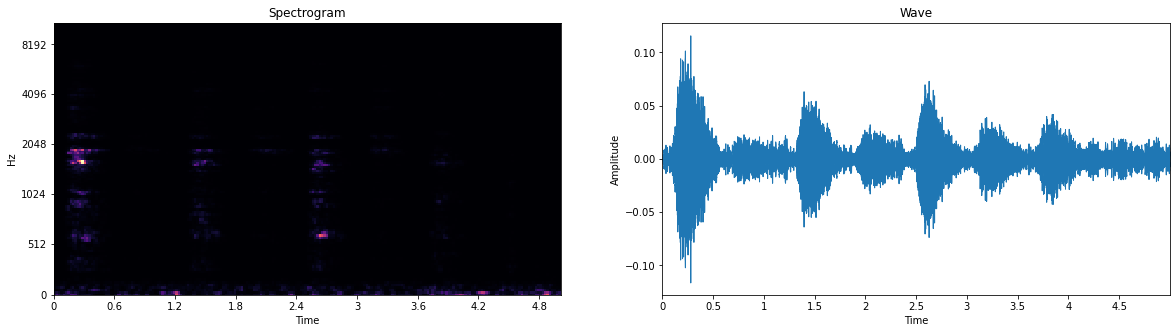

CLASS:  Human/ non-speech sounds
SUBCLASS:  Breathing


In [8]:
training_number_example = len(audio_files)

random_index = np.random.randint(0, training_number_example)

plt.figure(figsize=(20,5))
plt.subplot(121)

audio, _class = audio_files[random_index][0], audio_files[random_index][1]
# print(audio, _class)

spectrogram = librosa.feature.melspectrogram(audio)
plt.title("Spectrogram")
librosa.display.specshow(spectrogram, y_axis='mel', x_axis='time')

sampling_rate = int(len(audio)/5)
plt.subplot(122)
plt.title("Wave")
librosa.display.waveplot(audio, sr=sampling_rate)
plt.ylabel('Amplitude')
plt.show()

print('CLASS: ',categories[int(_class/10)])
print('SUBCLASS: ',class_esc50[_class])

Audio(audio, rate=sampling_rate)

In [28]:
audio_files = np.array(audio_files)
# X = np.array(audio_files[:,0])
X = list(audio_files[:,0])
Y = audio_files[:,1]

# del audio_files
print(len(X))

2000


In [29]:
size_of_audio_files = len(X[0])
number_of_audio_files = len(Y)
# print(X[0].tolist())

augmented_audio_files = []

for i in range(number_of_audio_files):
    X.append(X[i] + 0.005*np.random.randn(size_of_audio_files))

Y = np.r_[Y, Y]

In [11]:
print(len(Y))
# X = np.asarray(X).astype('float32')

4000


In [25]:
# X = np.asarray(X).astype('int32')
# Y = np.asarray(Y).astype('int32')

In [30]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.1, random_state=5, shuffle=True)

In [31]:
x = train_x
train_x = []
length = len(train_y)
for i in range(length):
    train_x.append(librosa.feature.melspectrogram(x[i], sampling_rate))
# del x

In [32]:
SPECH_H, SPECH_W = train_x[0].shape
train_x = np.reshape(train_x, (length, SPECH_H, SPECH_W, 1))
print(train_x.shape)

(3600, 128, 216, 1)


In [42]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(SPECH_H, SPECH_W, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [43]:
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation="softmax"))

In [44]:
train_x = np.asarray(train_x).astype('int64')
train_y = np.asarray(train_y).astype('int64')

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 126, 214, 64)      640       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 63, 107, 64)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 61, 105, 128)      73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 30, 52, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 50, 256)       295168    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 25, 256)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 23, 256)      

In [46]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(train_x, train_y, batch_size= 30, epochs= 50, validation_split= 0.1)

Epoch 1/50
108/108 [==============================] - 190s 2s/step - loss: 6.9172 - accuracy: 0.0621 - val_loss: 3.5455 - val_accuracy: 0.1111
Epoch 2/50
108/108 [==============================] - 188s 2s/step - loss: 3.4402 - accuracy: 0.1524 - val_loss: 2.9149 - val_accuracy: 0.2806
Epoch 3/50
108/108 [==============================] - 188s 2s/step - loss: 2.9293 - accuracy: 0.2496 - val_loss: 2.4946 - val_accuracy: 0.3222
Epoch 4/50
108/108 [==============================] - 186s 2s/step - loss: 2.5160 - accuracy: 0.3310 - val_loss: 2.1922 - val_accuracy: 0.4222
Epoch 5/50
108/108 [==============================] - 185s 2s/step - loss: 2.1052 - accuracy: 0.4327 - val_loss: 2.0675 - val_accuracy: 0.4306
Epoch 6/50
108/108 [==============================] - 186s 2s/step - loss: 1.8503 - accuracy: 0.4909 - val_loss: 1.7436 - val_accuracy: 0.5389
Epoch 7/50
108/108 [==============================] - 186s 2s/step - loss: 1.6791 - accuracy: 0.5488 - val_loss: 1.5018 - val_accuracy: 0.6056

In [ ]:
def test_model(train_x, train_y):
    random_index = np.random.randint(0, len(test_x))
    audio = test_x[random_index]
    
    plt.figure(figsize=(20, 5))
    plt.subplot(121)
    
    spectrogram = librosa.feature.melspectrogram(audio, sampling_rate)
    plt.title("Spectrogram")
    librosa.display.specshow(spectrogram, y_axis='mel', x_axis='time')
    
    plt.subplot(122)
    plt.title("Wave")
    librosa.display.waveplot(audio, sr=sampling_rate)
    plt.ylabel('Amplitude')
    plt.show()
    
    Audio(audio, rate=sampling_rate)
    
    spectrogram = np.reshape(spectrogram, (1, SPECH_H, SPECH_W, 1))
    prediction = list(model.predict(spectrogram).flatten())
    print("Predicted Category : ", categories[prediction.index(max(prediction))//10])
    print("Actual Category : ", categories[test_y[random_index]//10])
    
    print('\nPredicted Class : ', class_esc50[prediction.index(max(prediction))])
    print('Actual Class ', class_esc50[test_y[random_index]])

In [ ]:
for i in range(5):
    test_model(train_x, train_y)